# 1번-(1)


In [128]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error

In [109]:
pip install mglearn

     |████████████████████████████████| 542kB 6.3MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=f9b729234ab52807616b7a4838fdc3c39a8c349c0bfe2a0adb2fffd19cf56fb3
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [2]:
!pip install statsmodels


In [110]:
import statsmodels.api as sm
import mglearn 

In [4]:
MPG=pd.read_csv('/content/drive/Shareddrives/TNT/스터디/2021년 겨울방학/과제/2주차 과제/mpg - 과제용.csv')



In [5]:
MPG.head()
#origin 원핫인코딩 해줘야하나 의미있는 변수 같은뎀

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
from sklearn.preprocessing import LabelEncoder
origin1 = MPG[['origin']].values
origin_le = LabelEncoder()
origin1[:,0] = origin_le.fit_transform(origin1[:,0])
print(origin1)



[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]
 [1]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [0]
 [0]
 [2]
 [1]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [1]
 [1]
 [2]
 [2]
 [0]
 [2]
 [2]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [0]
 [1]
 [1]
 [2]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [1]
 [0]
 [1]
 [2]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [1]
 [2]


In [7]:
MPG.drop('origin',axis=1,inplace=True)


In [8]:
MPG.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino


In [9]:
MPG['origin']=origin1.astype('int')
MPG.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,origin
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,2
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,2
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,2
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,2
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,2
5,15.0,8,429.0,198.0,4341,10.0,70,ford galaxie 500,2
6,14.0,8,454.0,220.0,4354,9.0,70,chevrolet impala,2
7,14.0,8,440.0,215.0,4312,8.5,70,plymouth fury iii,2
8,14.0,8,455.0,225.0,4425,10.0,70,pontiac catalina,2
9,15.0,8,390.0,190.0,3850,8.5,70,amc ambassador dpl,2


In [10]:
MPG.info() #horsepower에 null..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   name          398 non-null    object 
 8   origin        398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [79]:
mean_horse = MPG['horsepower'].mean(axis=0)
MPG['horsepower'].fillna(mean_horse,inplace=True)
MPG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   name          398 non-null    object 
 8   origin        398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [80]:
MPG.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.449749
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.775076
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,2.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,2.000000


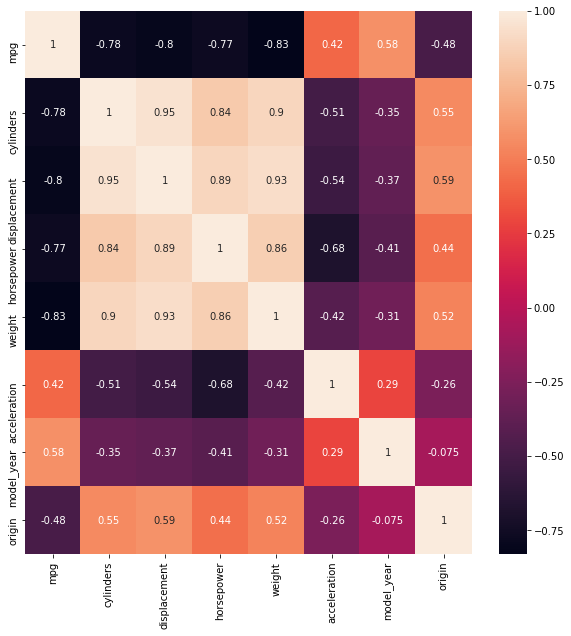

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))#하나의 도화지를 그려주겠다. 이거 없이 만들었을 때 heatmap크기가 좀 작아서 추가해준 코드.
sns.heatmap(MPG.corr(), annot=True)


In [82]:
features=['cylinders', 'displacement','horsepower','weight','acceleration','model_year','origin']#우리가 사용할 변수들
X_mpg=MPG[features] 
y_mpg=MPG['mpg']
print(X_mpg)
print("X_mpg:{}".format(X_mpg.shape)) #398개의 샘플과 5개의 특성


     cylinders  displacement  horsepower  ...  acceleration  model_year  origin
0            8         307.0       130.0  ...          12.0          70       2
1            8         350.0       165.0  ...          11.5          70       2
2            8         318.0       150.0  ...          11.0          70       2
3            8         304.0       150.0  ...          12.0          70       2
4            8         302.0       140.0  ...          10.5          70       2
..         ...           ...         ...  ...           ...         ...     ...
393          4         140.0        86.0  ...          15.6          82       2
394          4          97.0        52.0  ...          24.6          82       0
395          4         135.0        84.0  ...          11.6          82       2
396          4         120.0        79.0  ...          18.6          82       2
397          4         119.0        82.0  ...          19.4          82       2

[398 rows x 7 columns]
X_mpg:(398, 7)


In [83]:
x_add = sm.add_constant(X_mpg, prepend=False)
x_add

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,const
0,8,307.0,130.0,3504,12.0,70,2,1.0
1,8,350.0,165.0,3693,11.5,70,2,1.0
2,8,318.0,150.0,3436,11.0,70,2,1.0
3,8,304.0,150.0,3433,12.0,70,2,1.0
4,8,302.0,140.0,3449,10.5,70,2,1.0
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,2,1.0
394,4,97.0,52.0,2130,24.6,82,0,1.0
395,4,135.0,84.0,2295,11.6,82,2,1.0
396,4,120.0,79.0,2625,18.6,82,2,1.0


In [84]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x_add,y_mpg,random_state=42)
model2 = LinearRegression().fit(X_train,y_train)

print("model2.coef_: {}".format(model2.coef_))#학습된 계수 출력
print("model2.intercept_ : {}".format(model2.intercept_))

print("훈련 세트의 정확도 : {:.2f}".format(model2.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(model2.score(X_test,y_test)))


model2.coef_: [-0.0217373   0.01234184 -0.00385893 -0.00712376  0.07915229  0.83527091
 -1.49411043  0.        ]
model2.intercept_ : -19.739919695122897
훈련 세트의 정확도 : 0.81
테스트 세트의 정확도 : 0.84


In [85]:

model2 = sm.OLS(y_train, X_train).fit()
model2.summary()
#adj.r-squared 0.806으로 꽤 괜찮?!
#각 피처의 검정 통계량(t-통계량)을 봐야함. p-value와 함께 보면서, 각 피처가 얼마나 유의미한지.
#보통은 0.05 미만이면 유의미
#초과인것 -> cylinders, displacement, horsepower, acceleration 안 좋음

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     180.7
Date:                Sat, 09 Jan 2021   Prob (F-statistic):          8.12e-102
Time:                        17:13:35   Log-Likelihood:                -788.33
No. Observations:                 298   AIC:                             1593.
Df Residuals:                     290   BIC:                             1622.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.0217      0.395     -0.055      0.956      -0.799       0.755
displacement     0.0123      0.009      1.356      0.176      -0.006       0.030
horsepower      -0.0039      0.015     -0.252      0.801      -0.034       0.026
weight          -0.0071      0.001     -9.466      0.000      -0.009      -0.006
acceleration     0.0792      0.112      0.704      0.482      -0.142       0.301
model_year       0.8353      0.063     13.192      0.000       0.711       0.960
origin          -1.4941      0.336     -4.444      0.000      -2.156      -0.832
const          -19.7399      5.616     -3.515      0.001     -30.793      -8.687
==============================================================================
Omnibus:                       18.457   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.629
Skew:                           0.471   Prob(JB):                     4.49e-06
Kurtosis:                       4.046   Cond. No.                     8.71e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[Text(0, 0, 'cylinders'),
 Text(0, 0, 'displacement'),
 Text(0, 0, 'horsepower'),
 Text(0, 0, 'weight'),
 Text(0, 0, 'acceleration'),
 Text(0, 0, 'model_year'),
 Text(0, 0, 'origin'),
 Text(0, 0, 'const')]

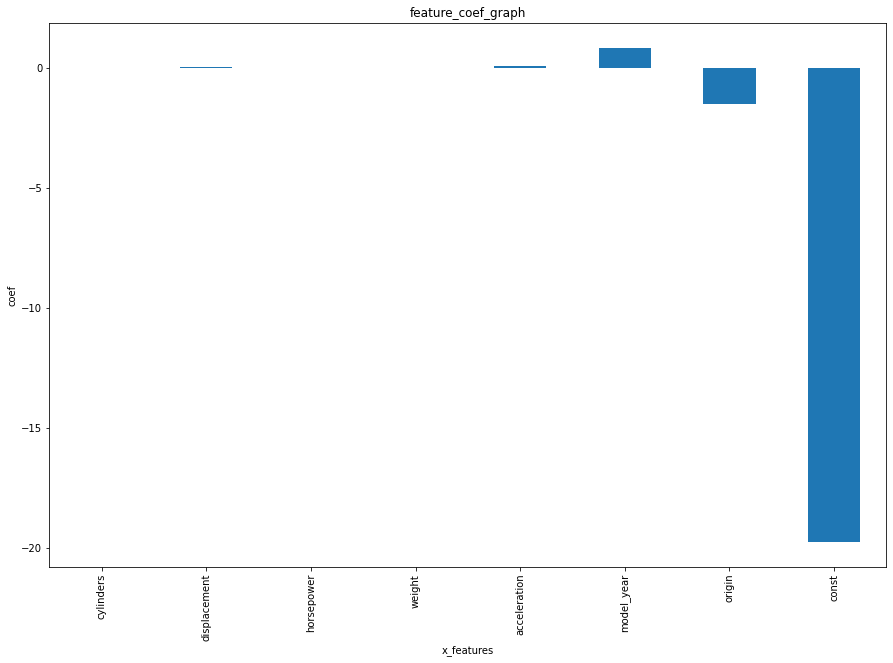

In [86]:
#어떤 피처가 영향력이 강한가
plt.rcParams['figure.figsize']=[15,10]
coefs = model2.params.tolist()
coefs_series = pd.Series(coefs)
x_labels = model2.params.index.tolist()
ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)
#엥 constant가 왜 이렇게 크게 나오지 ㅜㅜ , displacement horsepower weight는 아예 영향을 안줬네 흠

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_add.values, i) for i in range(x_add.shape[1])]
vif["features"] = x_add.columns
vif.round(1)
#cylinders, displacement, weight 안 좋음


,VIF Factor,features
0,10.6,cylinders
1,22.4,displacement
2,8.8,horsepower
3,10.5,weight
4,2.5,acceleration
5,1.3,model_year
6,1.7,origin
7,740.9,const


In [88]:
features2 = ['weight','model_year','origin'] #일단  P>|t| 안 좋았던거 제외함
X = MPG[features2]
y = MPG['mpg']
X

,weight,model_year,origin
0,3504,70,2
1,3693,70,2
2,3436,70,2
3,3433,70,2
4,3449,70,2
...,...,...,...
393,2790,82,2
394,2130,82,0
395,2295,82,2
396,2625,82,2


In [89]:
x_add2 = sm.add_constant(X, prepend=False)
x_add2

,weight,model_year,origin,const
0,3504,70,2,1.0
1,3693,70,2,1.0
2,3436,70,2,1.0
3,3433,70,2,1.0
4,3449,70,2,1.0
...,...,...,...,...
393,2790,82,2,1.0
394,2130,82,0,1.0
395,2295,82,2,1.0
396,2625,82,2,1.0


In [90]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x_add2,y,random_state=42)
model3 = LinearRegression().fit(X_train,y_train)

print("model3.coef_: {}".format(model3.coef_))#학습된 계수 출력
print("model3.intercept_ : {}".format(model3.intercept_))

print("훈련 세트의 정확도 : {:.2f}".format(model3.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(model3.score(X_test,y_test)))
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42) 
#변수 너무 적어서 안 좋게 나올 줄 알았는데 괜찮

model3.coef_: [-0.00614709  0.81526823 -1.25579666  0.        ]
model3.intercept_ : -18.36981560140806
훈련 세트의 정확도 : 0.81
테스트 세트의 정확도 : 0.83


In [91]:

model3 = sm.OLS(y_train, X_train).fit()
model3.summary()
#Adj.R-squared 매우 높게 나옴

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              4806.
Date:                Sat, 09 Jan 2021   Prob (F-statistic):                   4.94e-250
Time:                        17:14:05   Log-Likelihood:                         -797.35
No. Observations:                 298   AIC:                                      1601.
Df Residuals:                     295   BIC:                                      1612.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
weight        -0.0066      0.000    -24.052      0.000      -0.007      -0.006
model_year     0.5911      0.009     62.975      0.000       0.573       0.610
origin        -1.2017      0.309     -3.893      0.000      -1.809      -0.594
==============================================================================
Omnibus:                       32.762   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.097
Skew:                           0.661   Prob(JB):                     1.79e-12
Kurtosis:                       4.616   Cond. No.                     4.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_add2.values, i) for i in range(x_add2.shape[1])]
vif["features"] = x_add2.columns
vif.round(1) #all good

,VIF Factor,features
0,1.5,weight
1,1.1,model_year
2,1.4,origin
3,536.5,const


#1번 -(2)
feature_coef_graph를 보니 origin, model_year는 다른 변수들에 비해 결과에 영향을 많이 미치는 변수이고, displacement는 다중공선성 때문에 결과에 방해되어 제거, P>|t| 값이 0.05를 초과해서 무의미한 cylinders, displacement,horsepower, acceleration 제거

# 2번 방법1-(1)


In [93]:
train=pd.read_csv('/content/drive/Shareddrives/TNT/스터디/2021년 겨울방학/과제/2주차 과제/concrete_train.csv')
test=pd.read_csv('/content/drive/Shareddrives/TNT/스터디/2021년 겨울방학/과제/2주차 과제/concrete_test.csv')


In [94]:
train.head()

,Unnamed: 0,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,0,277.0,0.0,0.0,191.0,0.0,968.0,856.0,28,25.97
1,1,359.0,19.0,141.0,154.0,10.9,942.0,801.0,3,25.12
2,2,272.8,181.9,0.0,185.7,0.0,1012.4,714.3,28,31.38
3,3,366.0,187.0,0.0,191.0,7.0,824.0,757.0,28,65.91
4,4,212.6,0.0,100.4,159.4,10.4,1003.8,903.8,3,13.33


In [95]:
train.drop('Unnamed: 0',axis=1,inplace=True)


In [96]:
train

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,277.0,0.0,0.0,191.0,0.0,968.0,856.0,28,25.97
1,359.0,19.0,141.0,154.0,10.9,942.0,801.0,3,25.12
2,272.8,181.9,0.0,185.7,0.0,1012.4,714.3,28,31.38
3,366.0,187.0,0.0,191.0,7.0,824.0,757.0,28,65.91
4,212.6,0.0,100.4,159.4,10.4,1003.8,903.8,3,13.33
...,...,...,...,...,...,...,...,...,...
819,284.0,119.7,0.0,168.3,7.2,970.4,794.2,28,40.93
820,280.0,129.0,100.0,172.0,9.0,825.0,805.0,28,52.82
821,141.3,212.0,0.0,203.5,0.0,971.8,748.5,90,39.66
822,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29


In [97]:
train.info()
#null값 없음!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            824 non-null    float64
 1   slag              824 non-null    float64
 2   flyash            824 non-null    float64
 3   water             824 non-null    float64
 4   superplasticizer  824 non-null    float64
 5   coarseaggregate   824 non-null    float64
 6   fineaggregate     824 non-null    float64
 7   age               824 non-null    int64  
 8   csMPa             824 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 58.1 KB


In [98]:
test.drop('Unnamed: 0',axis=1,inplace=True)

In [99]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            206 non-null    float64
 1   slag              206 non-null    float64
 2   flyash            206 non-null    float64
 3   water             206 non-null    float64
 4   superplasticizer  206 non-null    float64
 5   coarseaggregate   206 non-null    float64
 6   fineaggregate     206 non-null    float64
 7   age               206 non-null    int64  
 8   csMPa             206 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 14.6 KB


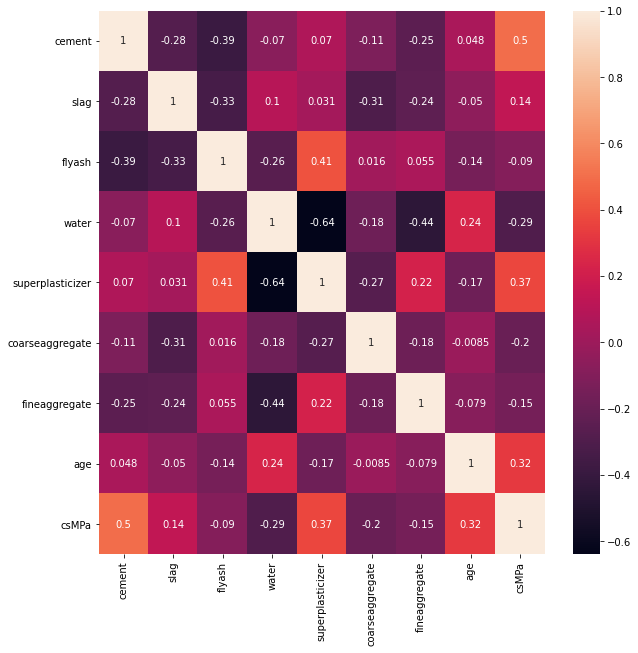

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))#하나의 도화지를 그려주겠다. 이거 없이 만들었을 때 heatmap크기가 좀 작아서 추가해준 코드.
sns.heatmap(train.corr(), annot=True)
#여기서는 csMPa와 모두 상관관계가 낮은데 일단 이걸로 변수 제외는 해주지 않는걸로..!

In [101]:
features=['cement', 'slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age']#우리가 사용할 변수들
X=train[features] 
y=train['csMPa']
X

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,277.0,0.0,0.0,191.0,0.0,968.0,856.0,28
1,359.0,19.0,141.0,154.0,10.9,942.0,801.0,3
2,272.8,181.9,0.0,185.7,0.0,1012.4,714.3,28
3,366.0,187.0,0.0,191.0,7.0,824.0,757.0,28
4,212.6,0.0,100.4,159.4,10.4,1003.8,903.8,3
...,...,...,...,...,...,...,...,...
819,284.0,119.7,0.0,168.3,7.2,970.4,794.2,28
820,280.0,129.0,100.0,172.0,9.0,825.0,805.0,28
821,141.3,212.0,0.0,203.5,0.0,971.8,748.5,90
822,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28


In [102]:
x_add = sm.add_constant(X, prepend=False)
x_add

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,const
0,277.0,0.0,0.0,191.0,0.0,968.0,856.0,28,1.0
1,359.0,19.0,141.0,154.0,10.9,942.0,801.0,3,1.0
2,272.8,181.9,0.0,185.7,0.0,1012.4,714.3,28,1.0
3,366.0,187.0,0.0,191.0,7.0,824.0,757.0,28,1.0
4,212.6,0.0,100.4,159.4,10.4,1003.8,903.8,3,1.0
...,...,...,...,...,...,...,...,...,...
819,284.0,119.7,0.0,168.3,7.2,970.4,794.2,28,1.0
820,280.0,129.0,100.0,172.0,9.0,825.0,805.0,28,1.0
821,141.3,212.0,0.0,203.5,0.0,971.8,748.5,90,1.0
822,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,1.0


In [130]:
from sklearn.model_selection import train_test_split


model_1 = LinearRegression().fit(x_add,y)

print("model2.coef_: {}".format(model_1.coef_))#학습된 계수 출력
print("model2.intercept_ : {}".format(model_1.intercept_))

print("훈련 세트의 정확도 : {:.2f}".format(model_1.score(x_add,y)))


model2.coef_: [ 0.12424381  0.10766686  0.091274   -0.13804472  0.36192166  0.01718424
  0.01984496  0.12008255  0.        ]
model2.intercept_ : -26.621179089699012
훈련 세트의 정확도 : 0.63


In [146]:
model_1 = sm.OLS(y, x_add).fit()
model_1.summary()
#0.05 초과인 coarseaggregate, fineaggregat는 무의미한 변수

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  csMPa   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     176.3
Date:                Sat, 09 Jan 2021   Prob (F-statistic):          5.01e-172
Time:                        17:47:54   Log-Likelihood:                -3080.6
No. Observations:                 824   AIC:                             6179.
Df Residuals:                     815   BIC:                             6222.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cement               0.1242      0.009     13.490      0.000       0.106       0.142
slag                 0.1077      0.011      9.825      0.000       0.086       0.129
flyash               0.0913      0.014      6.671      0.000       0.064       0.118
water               -0.1380      0.043     -3.226      0.001      -0.222      -0.054
superplasticizer     0.3619      0.104      3.483      0.001       0.158       0.566
coarseaggregate      0.0172      0.010      1.696      0.090      -0.003       0.037
fineaggregate        0.0198      0.012      1.703      0.089      -0.003       0.043
age                  0.1201      0.006     19.602      0.000       0.108       0.132
const              -26.6212     28.565     -0.932      0.352     -82.692      29.449
==============================================================================
Omnibus:                        9.843   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.823
Skew:                          -0.256   Prob(JB):                      0.00736
Kurtosis:                       3.156   Cond. No.                     1.04e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[Text(0, 0, 'cement'),
 Text(0, 0, 'slag'),
 Text(0, 0, 'flyash'),
 Text(0, 0, 'water'),
 Text(0, 0, 'superplasticizer'),
 Text(0, 0, 'coarseaggregate'),
 Text(0, 0, 'fineaggregate'),
 Text(0, 0, 'age'),
 Text(0, 0, 'const')]

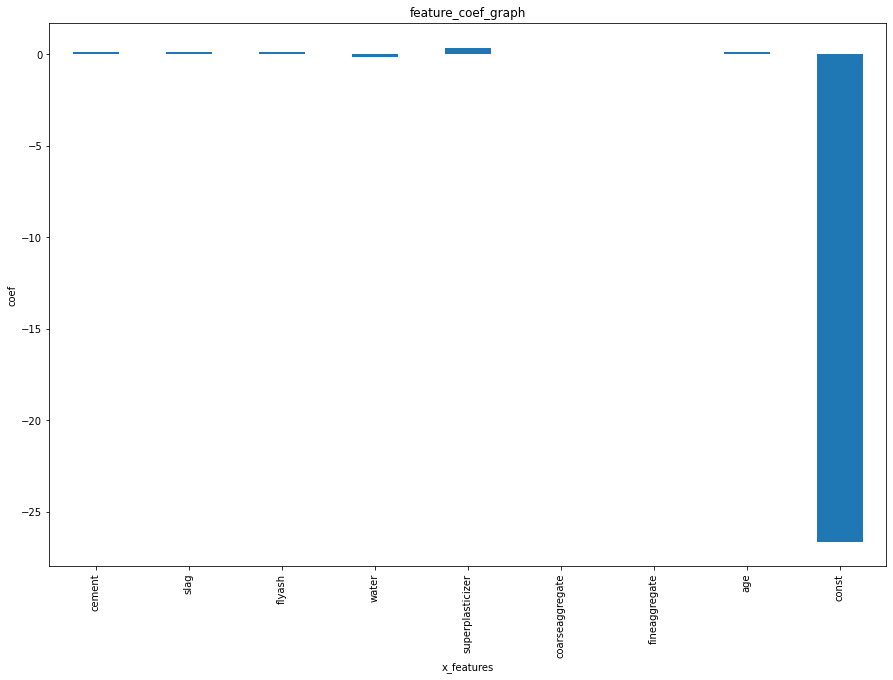

In [147]:
plt.rcParams['figure.figsize']=[15,10]
coefs = model_1.params.tolist()
coefs_series = pd.Series(coefs)
x_labels = model_1.params.index.tolist()
ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)
#골고루 영향 미침

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_add.values, i) for i in range(x_add.shape[1])]
vif["features"] = x_add.columns
vif.round(1) #VIF는 모두 좋음! 그나마 slag랑 cement..?

,VIF Factor,features
0,7.3,cement
1,6.9,slag
2,6.1,flyash
3,6.3,water
4,2.9,superplasticizer
5,4.8,coarseaggregate
6,6.6,fineaggregate
7,1.1,age
8,6427.8,const


In [149]:
features2 = ['cement','slag','flyash','water','superplasticizer','age'] #일단  P>|t| 안 좋았던거 제외함
X_train = train[features2]
y_train = train['csMPa']

X_test = test[features2]
y_test = test['csMPa']

In [150]:
x_add2 = sm.add_constant(X_train, prepend=False)
x_add2

,cement,slag,flyash,water,superplasticizer,age,const
0,277.0,0.0,0.0,191.0,0.0,28,1.0
1,359.0,19.0,141.0,154.0,10.9,3,1.0
2,272.8,181.9,0.0,185.7,0.0,28,1.0
3,366.0,187.0,0.0,191.0,7.0,28,1.0
4,212.6,0.0,100.4,159.4,10.4,3,1.0
...,...,...,...,...,...,...,...
819,284.0,119.7,0.0,168.3,7.2,28,1.0
820,280.0,129.0,100.0,172.0,9.0,28,1.0
821,141.3,212.0,0.0,203.5,0.0,90,1.0
822,135.0,0.0,166.0,180.0,10.0,28,1.0


In [151]:
model_2 = LinearRegression().fit(x_add2,y)

print("model2.coef_: {}".format(model_2.coef_))#학습된 계수 출력
print("model2.intercept_ : {}".format(model_2.intercept_))

print("훈련 세트의 정확도 : {:.2f}".format(model_2.score(x_add2,y)))

model2.coef_: [ 0.11021077  0.09088951  0.07270962 -0.20245601  0.31829982  0.11966665
  0.        ]
model2.intercept_ : 23.633388461881324
훈련 세트의 정확도 : 0.63


In [152]:
model_2 = sm.OLS(y, x_add2).fit()
model_2.summary()
#무의미한 변수 제거했는데 별 효과가 없음

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  csMPa   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     234.2
Date:                Sat, 09 Jan 2021   Prob (F-statistic):          1.04e-173
Time:                        17:48:44   Log-Likelihood:                -3082.2
No. Observations:                 824   AIC:                             6178.
Df Residuals:                     817   BIC:                             6211.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cement               0.1102      0.005     23.917      0.000       0.101       0.119
slag                 0.0909      0.006     16.455      0.000       0.080       0.102
flyash               0.0727      0.009      8.492      0.000       0.056       0.090
water               -0.2025      0.023     -8.833      0.000      -0.247      -0.157
superplasticizer     0.3183      0.094      3.373      0.001       0.133       0.504
age                  0.1197      0.006     19.537      0.000       0.108       0.132
const               23.6334      4.588      5.151      0.000      14.628      32.639
==============================================================================
Omnibus:                        8.932   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.881
Skew:                          -0.247   Prob(JB):                       0.0118
Kurtosis:                       3.122   Cond. No.                     4.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[Text(0, 0, 'cement'),
 Text(0, 0, 'slag'),
 Text(0, 0, 'flyash'),
 Text(0, 0, 'water'),
 Text(0, 0, 'superplasticizer'),
 Text(0, 0, 'age'),
 Text(0, 0, 'const')]

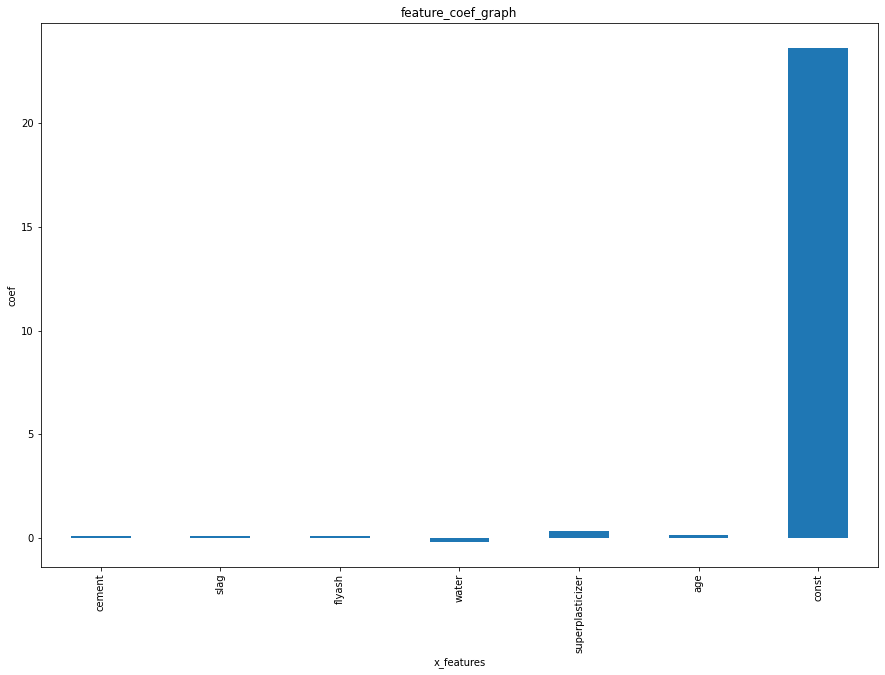

In [186]:
plt.rcParams['figure.figsize']=[15,10]
coefs = model_2.params.tolist()
coefs_series = pd.Series(coefs)
x_labels = model_2.params.index.tolist()
ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

In [185]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_add2.values, i) for i in range(x_add2.shape[1])]
vif["features"] = x_add2.columns
vif.round(1)

,VIF Factor,features
0,1.8,cement
1,1.7,slag
2,2.4,flyash
3,1.8,water
4,2.3,superplasticizer
5,1.1,age
6,165.6,const


In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5).fit(x_add2, y)

print("훈련 세트의 정확도 : {:.2f}".format(elastic_net.score(x_add2, y)))

#왜 변화가 없지 ,,? 

훈련 세트의 정확도 : 0.63


#2번 방법1 - (2)

coarseaggregate, fineaggregat는 비교적 무의미한 변수로 제거하였고
Concrete Compressive strength에 위의 두 변수 제외 모두 독립적으로 영향을 미치고 모두 골고루 영향을 미치지만 비교적 superplasticizer가 가장 많이 미친다고 할 수 있다. 

그런데 위에 보이듯이 뭘 해도 모델의 정확도가 똑같아서 잘 못 만든 것 같고 그래서 변수 설명도 제대로 안되는 것 같다..!

# 2번 방법1 - (3)

In [155]:
y_predictions = elastic_net.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions)))
y_predictions = elastic_net.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

10.234363245578898
10.061546903359233


#2번 방법2 - (1)


In [175]:
features=['cement', 'slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age']
train_x = train[features2]
train_y = train['csMPa']
test_x=test[features2]
test_y=test['csMPa']

In [163]:
def processSubset(X,y,feature_set):
  model = sm.OLS(y,X[list(feature_set)])
  regr = model.fit()
  AIC = regr.aic
  return{"model":regr, "AIC":AIC}

print(processSubset(X=train_x, y=train_y, feature_set = features[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f6deb537710>, 'AIC': 6498.591955661833}


In [169]:
import time
import itertools

def getBest(X,y,k):
  tic = time.time()
  results = []
  for combo in itertools.combinations(X.columns.difference(['const']), 2):
      print((list(combo)+['const']))
      
      results.append(processSubset(X,y,feature_set=combo))
  models = pd.DataFrame(results)
  best_model = models.loc[models['AIC'].argmin()]
  toc = time.time()
  print("Processed", models.shape[0], "models on", k, "predictors in", (toc - tic),
        "seconds.")
  return best_model

print(getBest(X=train_x,y=train_y,k=2))
#변수가 두 개 일 때 15개 모델을 찾았고 모델링하는데 걸린 시간은 대략 0.05초
#AIC값이 가장 작을 때는 6657,7

['age', 'cement', 'const']
['age', 'flyash', 'const']
['age', 'slag', 'const']
['age', 'superplasticizer', 'const']
['age', 'water', 'const']
['cement', 'flyash', 'const']
['cement', 'slag', 'const']
['cement', 'superplasticizer', 'const']
['cement', 'water', 'const']
['flyash', 'slag', 'const']
['flyash', 'superplasticizer', 'const']
['flyash', 'water', 'const']
['slag', 'superplasticizer', 'const']
['slag', 'water', 'const']
['superplasticizer', 'water', 'const']
Processed 15 models on 2 predictors in 0.05339670181274414 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                 6657.7
Name: 7, dtype: object


In [172]:
models = pd.DataFrame(columns=["AIC","model"])
tic = time.time()
for i in range(1,4):
  models.loc[i] = getBest(X=train_x,y=train_y, k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

['age', 'cement', 'const']
['age', 'flyash', 'const']
['age', 'slag', 'const']
['age', 'superplasticizer', 'const']
['age', 'water', 'const']
['cement', 'flyash', 'const']
['cement', 'slag', 'const']
['cement', 'superplasticizer', 'const']
['cement', 'water', 'const']
['flyash', 'slag', 'const']
['flyash', 'superplasticizer', 'const']
['flyash', 'water', 'const']
['slag', 'superplasticizer', 'const']
['slag', 'water', 'const']
['superplasticizer', 'water', 'const']
Processed 15 models on 1 predictors in 0.0623469352722168 seconds.
['age', 'cement', 'const']
['age', 'flyash', 'const']
['age', 'slag', 'const']
['age', 'superplasticizer', 'const']
['age', 'water', 'const']
['cement', 'flyash', 'const']
['cement', 'slag', 'const']
['cement', 'superplasticizer', 'const']
['cement', 'water', 'const']
['flyash', 'slag', 'const']
['flyash', 'superplasticizer', 'const']
['flyash', 'water', 'const']
['slag', 'superplasticizer', 'const']
['slag', 'water', 'const']
['superplasticizer', 'water', 'c

In [173]:
models
#aic 3개 다 똑같네?! 흠 달라야 하는거 아닌가

,AIC,model
1,6657.695363,<statsmodels.regression.linear_model.Regressio...
2,6657.695363,<statsmodels.regression.linear_model.Regressio...
3,6657.695363,<statsmodels.regression.linear_model.Regressio...


In [174]:
models.loc[1,"model"].summary()
#방법1보다 더 높은 adf.r-squared

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  csMPa   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.877
Method:                 Least Squares   F-statistic:                              2946.
Date:                Sat, 09 Jan 2021   Prob (F-statistic):                        0.00
Time:                        18:27:13   Log-Likelihood:                         -3326.8
No. Observations:                 824   AIC:                                      6658.
Df Residuals:                     822   BIC:                                      6667.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cement               0.0992      0.002     44.708      0.000       0.095       0.104
superplasticizer     1.1209      0.079     14.121      0.000       0.965       1.277
==============================================================================
Omnibus:                        2.335   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.311   Jarque-Bera (JB):                2.321
Skew:                           0.091   Prob(JB):                        0.313
Kurtosis:                       2.814   Cond. No.                         49.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#2번 방법2-(2)

위에서 뽑은 best model에 어떤 변수가 뽑힌 건지 모르겠다,,! 알 수 있으면 그 변수 조합이 모델을 가장 잘 설명하는 변수라고 생각한다.

#2번 방법2-(3)


In [182]:
mean_squared_error(y_true=test['csMPa'],y_pred=models.predict(test_y))

#음 ㅜㅜ 방법2는 한 블로그 설명 읽고 참고해서 작성했는데 이 방법으로 mse 구하는 방법은 모르겠습니다 ㅠ

AttributeError: ignored